In [497]:
%matplotlib inline 
import matplotlib.pyplot as plt # To plot images
import cv2 # Image processing library
import time
import sys
sys.path.insert(0, '../') # Access the parent folder

# All source code
from src.img_utils import (extract_object, 
                           extract_all_objects)
from src.visual_bot import VisualBot

In [343]:
#Doesnt work very well
class PressReaction3Tool:
    def __init__(self):
        self.vb = VisualBot(display="99")
        self.target = self._get_target()

    def _get_target(self):
        self.target = plt.imread('../templates/aim_target.png')[:,:,:3]
        return self.target

    def _to_gamescreen(self):
        print("Moving down")
        self.vb.move_to(1000, 200)
        [self.vb.scroll_down() for x in range(5)]
    
    def access_game(self):
        self.vb.click(500,55)
        print("Accessing https://aim400kg.com/game/11")
        self.vb.write('https://aim400kg.com/game/11')
        self.vb.enter()
        time.sleep(1)
        #self._to_gamescreen()

    def _start_game(self):
        self.vb.click(500, 500)

    def to_new_round(self):
        self.vb.hit_key("f5")

    def show_screenshot(self):
        plt.figure(figsize=(25, 10))
        plt.imshow(self.vb.capture_screenshot())
        plt.show()
    
    def _bbox_coordinates(self):
        self._start_game()
        time.sleep(10)
        bounding_box = extract_object(self.target, self.vb.capture_screenshot())
        print(bounding_box)
        return bounding_box
    
    def play_game(self):
        '''Function '''
        coordinate = self._bbox_coordinates()
        self._start_game()
        count = 0 
        while count < 10:
            bounding_box = extract_object(self.target, self.vb.capture_screenshot()) 
            if bounding_box == coordinate:
                self.vb.click_bbox(bounding_box)
                count += 1
        plt.figure(figsize=(25, 10))
        plt.imshow(self.vb.capture_screenshot())
        plt.show()
        

In [499]:
#Quick access to the link
def access_game(vb, link):
    vb.click(500,55)
    print("Accessing " + link)
    vb.write(link)
    vb.enter()
    time.sleep(1)

In [503]:
access_game(vb, 'https://aim400kg.com/game/11')

Accessing https://aim400kg.com/game/11


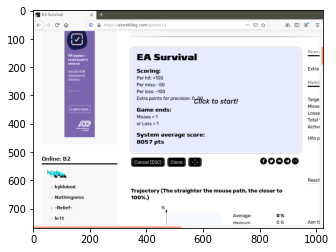

In [508]:
plt.imshow(vb.capture_screenshot())

In [463]:

#vb.click(200,395)
#vb.write("123456789")
vb.click(500,500)


In [507]:
vb.move_to(1000, 200)
[vb.scroll_down() for x in range(5)]

[None, None, None, None, None]

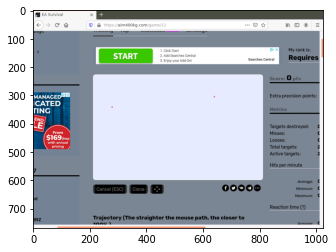

In [451]:
I2 = (vb.capture_screenshot())
plt.imshow(I2)

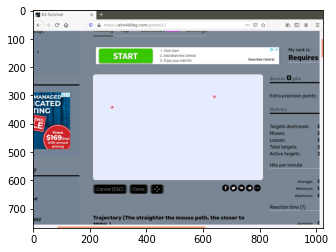

In [452]:
I3 = (vb.capture_screenshot())
plt.imshow(I3)

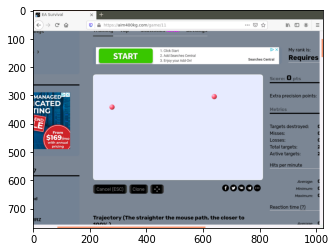

In [453]:
I4 = (vb.capture_screenshot())
plt.imshow(I4)

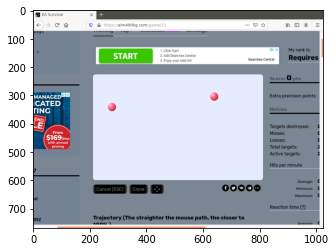

In [454]:
I5 = (vb.capture_screenshot())
plt.imshow(I5)

In [9]:
def show_bbox(I, bbox):
    """Show bounding box on image"""
    I_copy = I.copy()
    top_left, bottom_right = bbox
    cv2.rectangle(I_copy, top_left, bottom_right, 255, 2)
    plt.figure(figsize=(100, 50))
    plt.imshow(I_copy)
    plt.show()

The text recognition algorithm still has some errors to fix. The algorithm doesn't seem to do well in distinguishing symbols versus strings (i.e. 11 vs star symbol), and it frequently make these mistakes. It doesn't seem to do recognize strings the way we want to see (i.e. httpsillaimsookg).

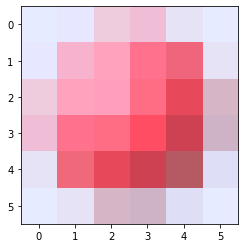

In [436]:
I3_target = I3[470:476, 378:384]
plt.imshow(I3_target)
plt.imsave('../templates/I3_target.png', I3_target)

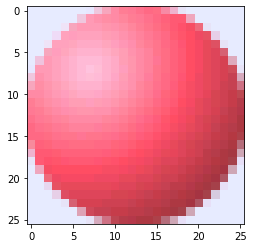

In [517]:
target = plt.imread('../templates/I2_target.png')[:,:,:3]

plt.imshow(target)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


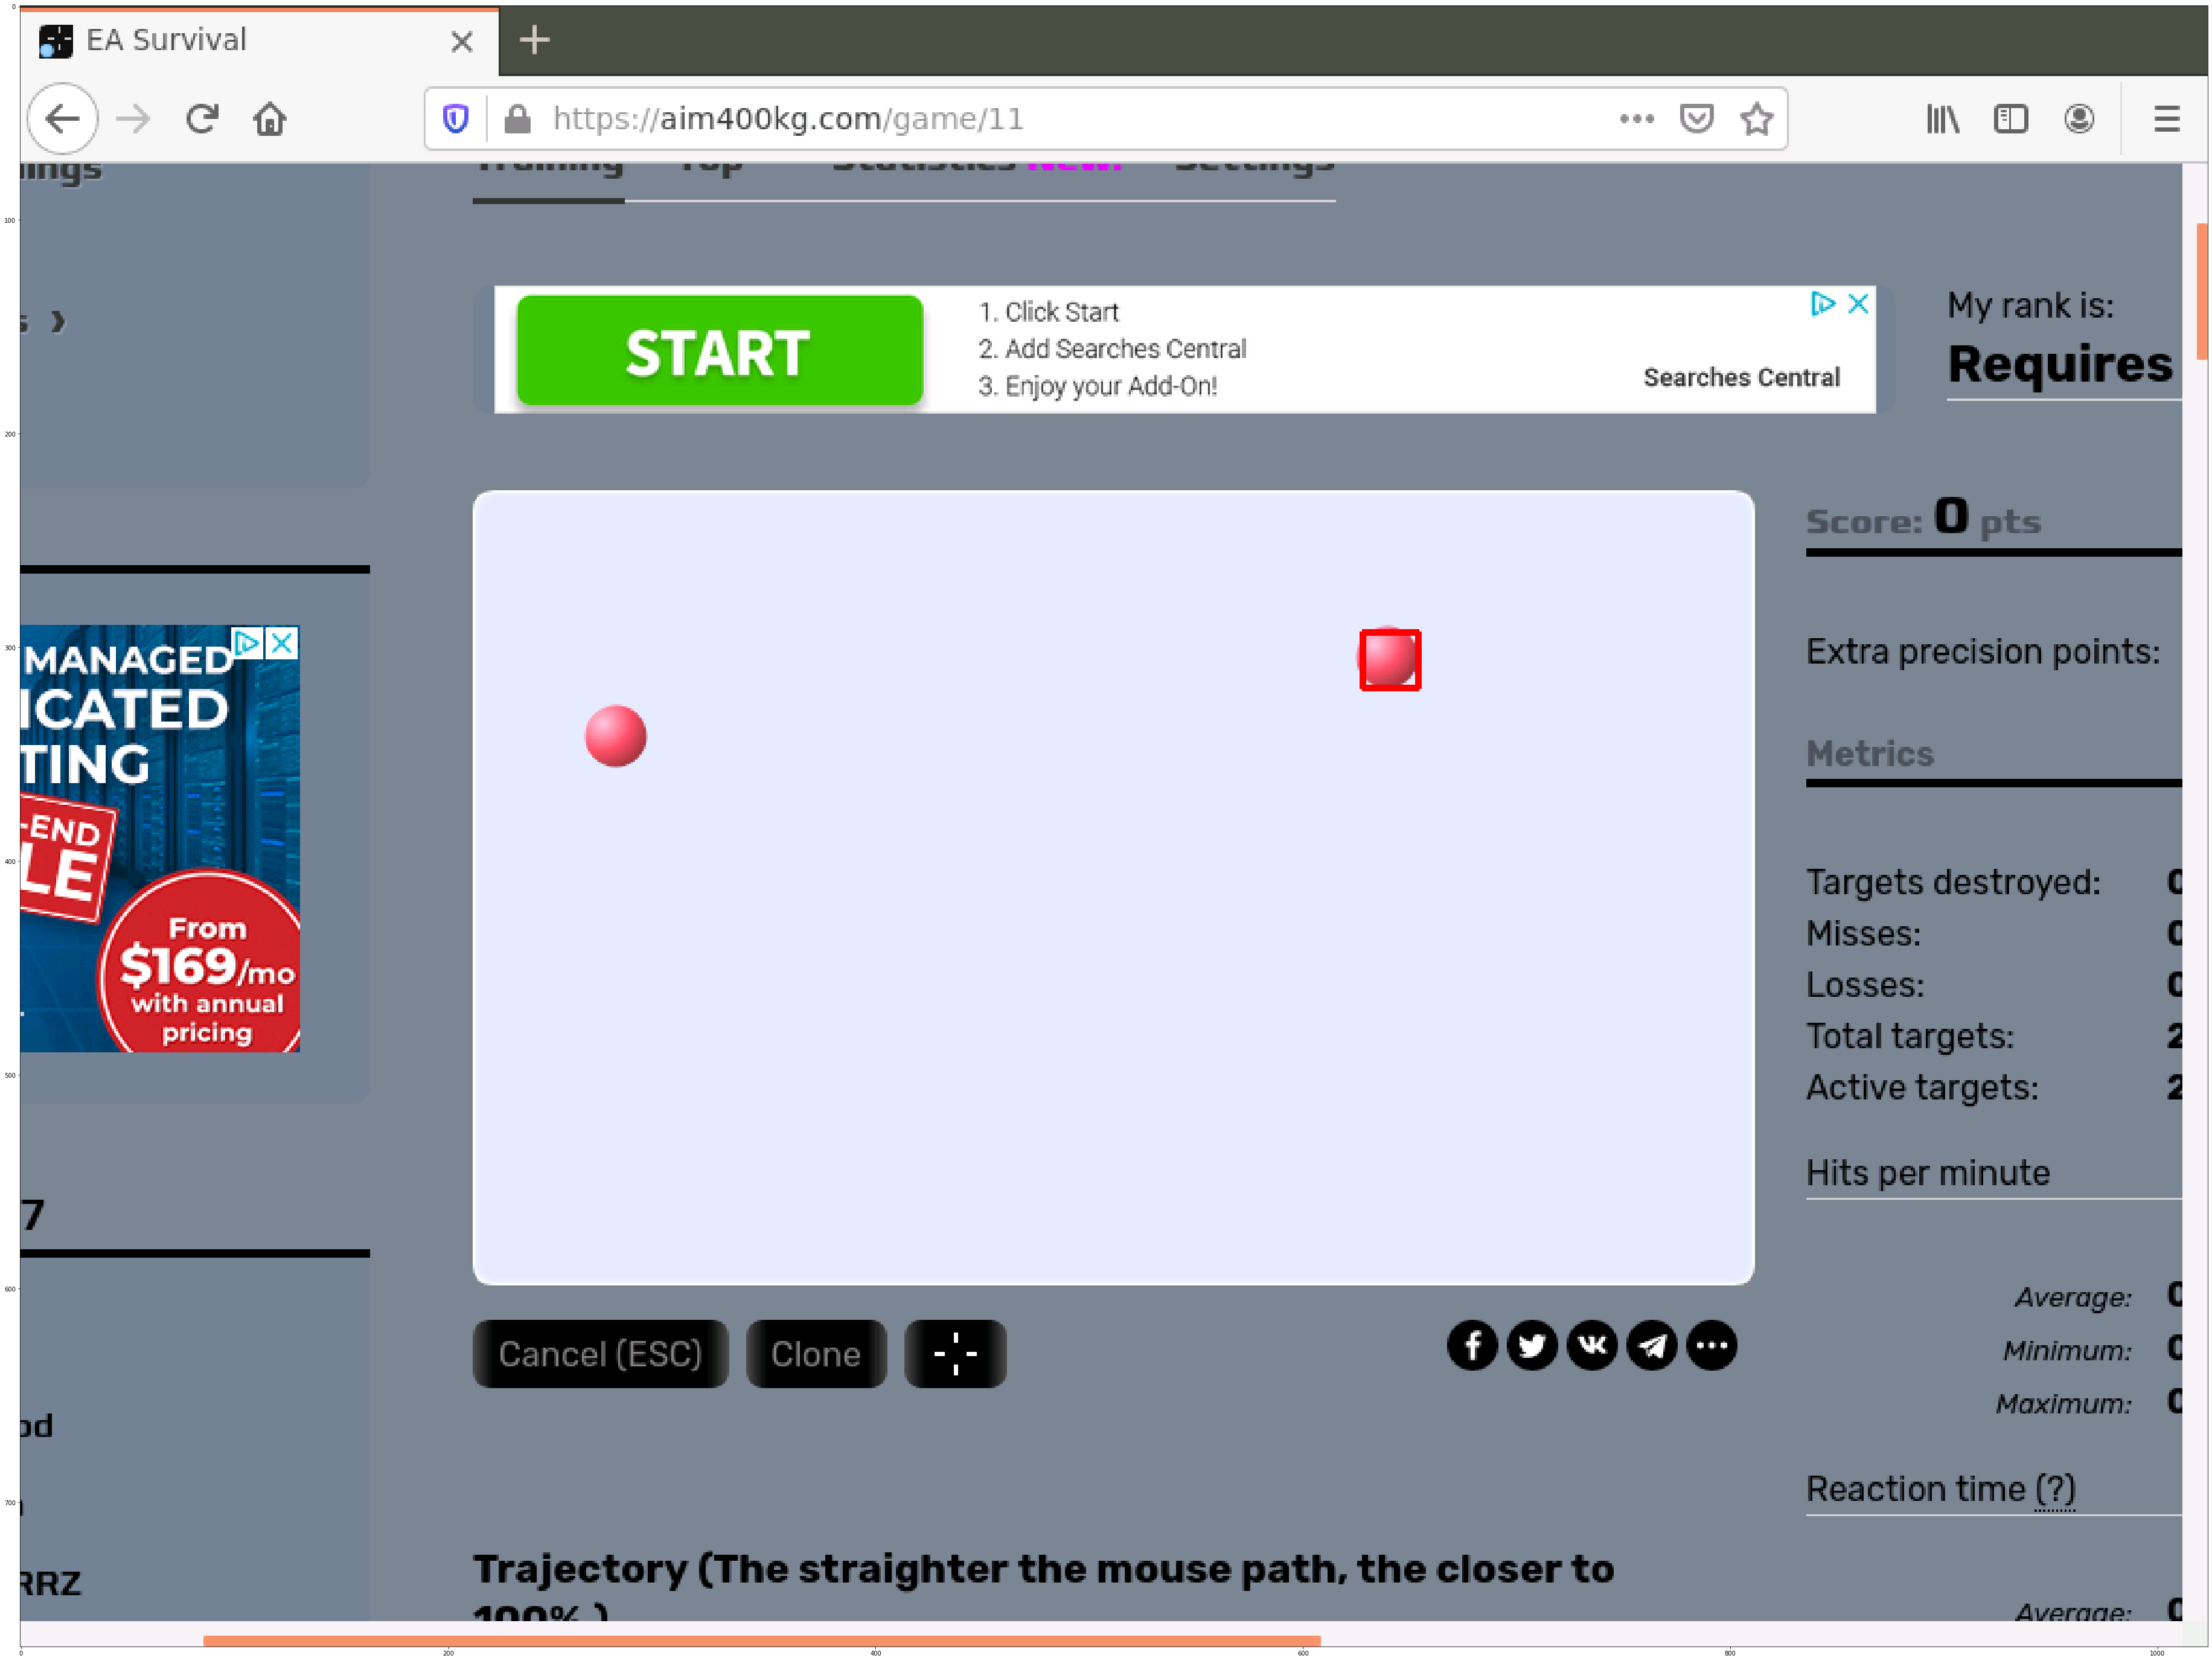

In [521]:
#Make the bot learn the target
I2_target = plt.imread('../templates/I3_target.png')[:,:,:3]

# 4th color channel is added to this pic, only use first 3 (if we have 4th, there'll be error)

# This function is not included in VisualBot (yet), but we may in the future.
bounding_box2 = extract_object(target, I5) # Will be extract_object(I, arrow_button) in future for consistency 
show_bbox(I5, bounding_box2)

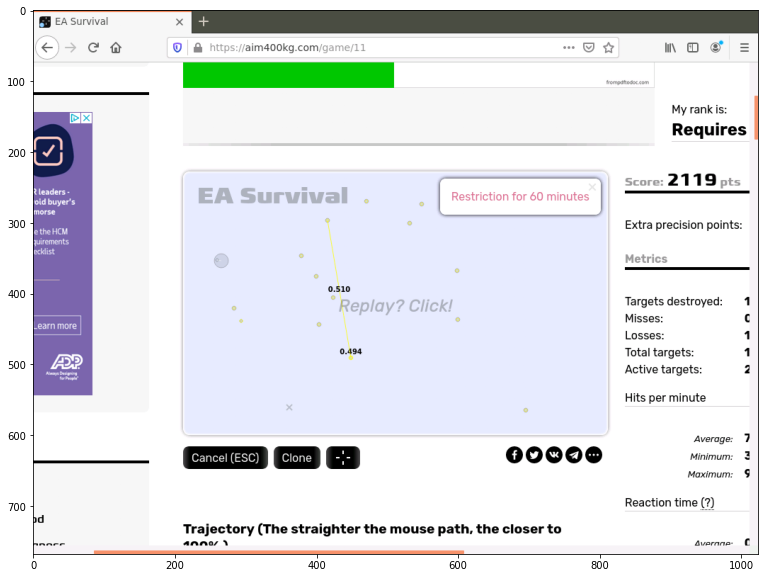

In [515]:
#Play EA Survival 
count = 0 
while count < 30:
    bounding_box = extract_object(I3_target, vb.capture_screenshot()) 
    vb.click_bbox(bounding_box)
    count += 1
plt.figure(figsize=(25, 10))
plt.imshow(vb.capture_screenshot())
plt.show()

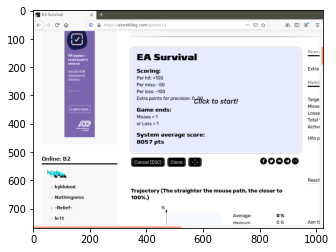

In [510]:
plt.imshow(vb.capture_screenshot())


In [513]:
vb.click(500,500)
vb.click(500,500)
